# Your First Deep Learning Project in Python with Keras Step-by-Step

Source: [ML Mastery](https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/)

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

from numpy import loadtxt

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.backend import clear_session

from tensorflow.random import set_seed
set_seed(42)

In [26]:
plt.style.use('ggplot')

In [5]:
# Load dataset
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=',')

Input Variables (X):
* Number of times pregnant
* Plasma glucose concentration at 2 hours in an oral glucose tolerance test
* Diastolic blood pressure (mm Hg)
* Triceps skin fold thickness (mm)
* 2-hour serum insulin (mu U/ml)
* Body mass index (weight in kg/(height in m)^2)
* Diabetes pedigree function
* Age (years)

Output Variables (y):
* Class variable (0 or 1)

In [6]:
# Split data into input (X) and output (y) variables
X = dataset[:,0:8]
y = dataset[:,8]

X.shape, y.shape

((768, 8), (768,))

In [7]:
# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

The first thing to get right is to ensure the input layer has the correct number of input features. This can be specified when creating the first layer with the `input_shape` argument and setting it to `(8,)` for presenting the eight input variables as a vector.

**Note:** The most confusing thing here is that the shape of the input to the model is defined as an argument on the first hidden layer. This means that the line of code that adds the first Dense layer is doing two things, defining the input or visible layer and the first hidden layer.

In [209]:
# Define Keras model
clear_session()

model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='relu')) 
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Remember training a network means finding the best set of weights to map inputs to outputs in your dataset. You must specify the loss function to use to evaluate a set of weights, the optimizer used to search through different weights for the network, and any optional metrics you want to collect and report during training. Use cross entropy as the loss argument. This loss is for a binary classification problems and is defined in Keras as `binary_crossentropy`. Define the optimizer as the efficient stochastic gradient descent algorithm `adam`. This is a popular version of gradient descent because it automatically tunes itself and gives good results in a wide range of problems. Collect and report the classification accuracy defined via the metrics argument.

In [210]:
# Compile keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [211]:
%%time

# Fit model on dataset
epochs = 100
verbose = 0
batch_size = 10 #default 32

history = model.fit(X_train, y_train, validation_split=0.25, epochs=epochs, batch_size=batch_size, verbose=verbose)

Wall time: 12.3 s


In [212]:
# List data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [213]:
def learning_curve_loss(history):
    """
    Function to plot training and validation loss
    """
    plt.figure(figsize=(6,4))
    plt.plot(history.history["loss"], color="r", label="Training Loss")
    plt.plot(history.history["val_loss"], color="b", label="Validation Loss")
    plt.legend(loc="upper right")
    plt.xlabel("Epoch", fontsize=16)
    plt.ylabel("Loss", fontsize=16)
    plt.ylim([0, max(history.history["loss"])+1])
    plt.title("Training and Validation Loss", fontsize=16);

In [214]:
def learning_curve_accuracy(history):
    """
    Function to plot training and validation accuracy
    """
    plt.figure(figsize=(6,4))
    plt.plot(history.history["accuracy"], color="r", label="Training Accuracy")
    plt.plot(history.history["val_accuracy"], color="b", label="Validation Accuracy")
    plt.legend(loc="best")
    plt.xlabel("Epoch", fontsize=16)
    plt.ylabel("Accuracy", fontsize=16)
    plt.ylim([0, max(history.history["accuracy"])+0.05])
    plt.title("Training and Validation Accuracy", fontsize=16);

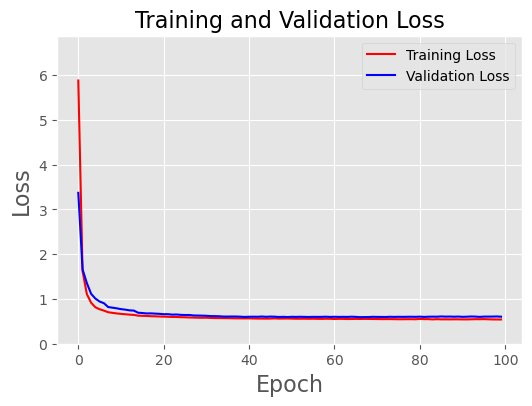

In [215]:
learning_curve_loss(history)

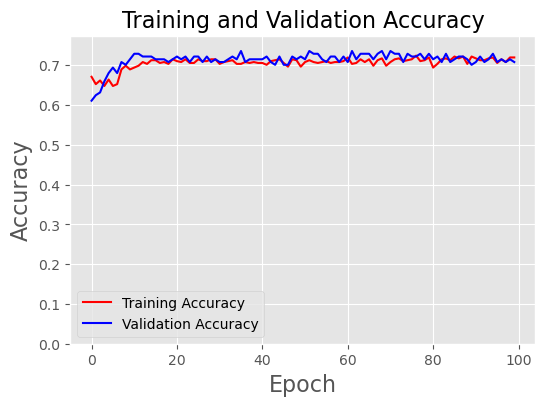

In [216]:
learning_curve_accuracy(history)

In [217]:
def learning_curve(history):
    """
    Function to plot training and validation loss and accuracy
    """
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
        
    ax[0].plot(history.history["loss"], color="r", label="Training Loss")
    ax[0].plot(history.history["val_loss"], color="b", label="Validation Loss")
    ax[0].legend(loc="upper right")
    ax[0].set_xlabel("Epoch", fontsize=14)
    ax[0].set_ylabel("Loss", fontsize=14)
    ax[0].set_ylim([0, max(history.history["loss"])+1])
    ax[0].set_title("Training and Validation Loss", fontsize=16)
    
    ax[1].plot(history.history["accuracy"], color="r", label="Training Loss")
    ax[1].plot(history.history["val_accuracy"], color="b", label="Validation Loss")
    ax[1].legend(loc="best")
    ax[1].set_xlabel("Epoch", fontsize=14)
    ax[1].set_ylabel("Accuracy", fontsize=14)
    ax[1].set_ylim([0, max(history.history["accuracy"])+0.05])
    ax[1].set_title("Training and Validation Accuracy", fontsize=16);    

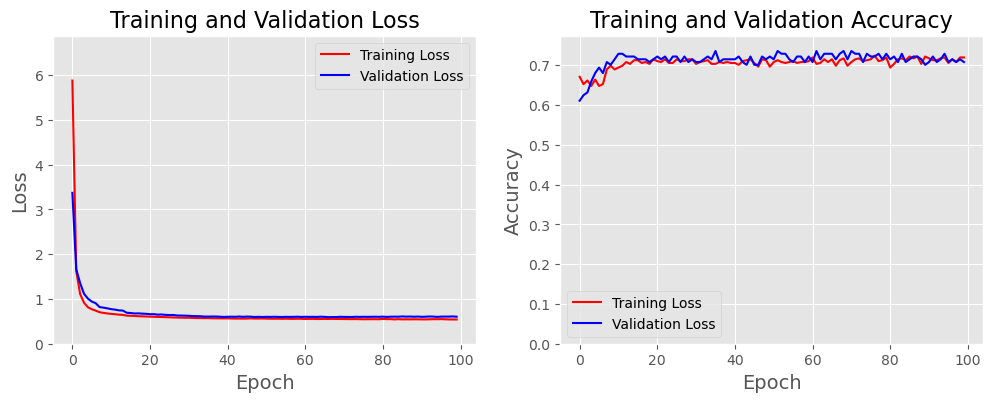

In [218]:
learning_curve(history)

In [219]:
# Evaluate model with test data
scores = model.evaluate(X_test, y_test, verbose = 0)
print(f'Test loss: {scores[0]:.4f}') 
print(f'Test accuracy: {scores[1]:.4f}')

Test loss: 0.6597
Test accuracy: 0.6979


Making predictions is as easy as calling the `predict()` function on the model. You are using a sigmoid activation function on the output layer, so the predictions will be a probability in the range between 0 and 1. You can easily convert them into a crisp binary prediction for this classification task by rounding them.

In [220]:
# Make probability predictions with the model
predictions = model.predict(X_test, verbose=0)
predictions[:5]

array([[0.5012982 ],
       [0.17866299],
       [0.28463268],
       [0.17369267],
       [0.3651171 ]], dtype=float32)

In [221]:
# Round predictions 
rounded = [round(x[0]) for x in predictions]
rounded[:5]

[1, 0, 0, 0, 0]

Alternately, you can convert the probability into 0 or 1 to predict crisp classes directly:

In [222]:
# Make class predictions with the model
predictions = (model.predict(X_test, verbose=0) > 0.5).astype(int)
predictions[:5]

array([[1],
       [0],
       [0],
       [0],
       [0]])

In [223]:
# Make class predictions with the model
predictions = (model.predict(X_test) > 0.5).astype(int)

# Summarize the first 5 cases
for i in range(5):
    print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y_test[i]))

6/6 [==============================] - 0s 1ms/step
[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0] => 1 (expected 0)
[1.0, 85.0, 66.0, 29.0, 0.0, 26.6, 0.351, 31.0] => 0 (expected 0)
[8.0, 183.0, 64.0, 0.0, 0.0, 23.3, 0.672, 32.0] => 0 (expected 0)
[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.167, 21.0] => 0 (expected 0)
[0.0, 137.0, 40.0, 35.0, 168.0, 43.1, 2.288, 33.0] => 0 (expected 0)


In [224]:
# Compile true vs predicted in a df
prediction_df = pd.DataFrame(y_test.astype(int), columns=['True'])
prediction_df["Predicted"] = predictions
prediction_df

,True,Predicted
0,0,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
187,0,0
188,1,1
189,0,1
190,1,0
